## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

In [288]:
import pandas as pd
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

In [289]:
df.isnull().sum() # пропусков нет

CertificationCourses    0
Gender                  0
Department              0
Height(CM)              0
Weight(KG)              0
10Mark                  0
12Mark                  0
CollegeMark             0
Hobbies                 0
DailyStudingTime        0
PreferToStudyIn         0
SalaryExpectation       0
LikeDegree              0
CareerBasedonDegree     0
GamesSpendingTime       0
TravellingTime          0
StressLevel             0
FinancialStatus         0
PartTimeJob?            0
dtype: int64

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

In [290]:
df['CareerBasedonDegree'] = df['CareerBasedonDegree'].str.strip('%').astype(int)

In [291]:
df.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

In [292]:
def to_minutes(time):
    time = time.lower().split()
    if 'more' in time:
        return int(time[2]) * 60
    if 'hour' in time:
        time = time[0].split('.') + [0]
        return int(time[0]) * 60 + int(time[1])
    return int(time[0])
    
df[['DailyStudingTime', 'GamesSpendingTime', 'TravellingTime ']] = df[['DailyStudingTime', 'GamesSpendingTime', 'TravellingTime ']].applymap(to_minutes)

**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

In [293]:
X = df[['Height(CM)', 'Weight(KG)',	'10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation']]
X

,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,SalaryExpectation
0,100.0,58.0,79.0,65.0,80.0,40000
1,90.0,40.0,70.0,80.0,70.0,15000
2,159.0,78.0,69.5,61.0,55.0,13000
3,147.0,20.0,70.0,59.0,58.0,1500000
4,170.0,54.0,40.0,65.0,30.0,50000
...,...,...,...,...,...,...
230,170.0,76.0,72.0,67.0,65.0,7000
231,172.0,52.0,72.0,70.0,76.0,25000
232,139.0,33.0,90.0,75.0,70.0,20000
233,153.0,58.0,85.0,74.0,75.0,20000


**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

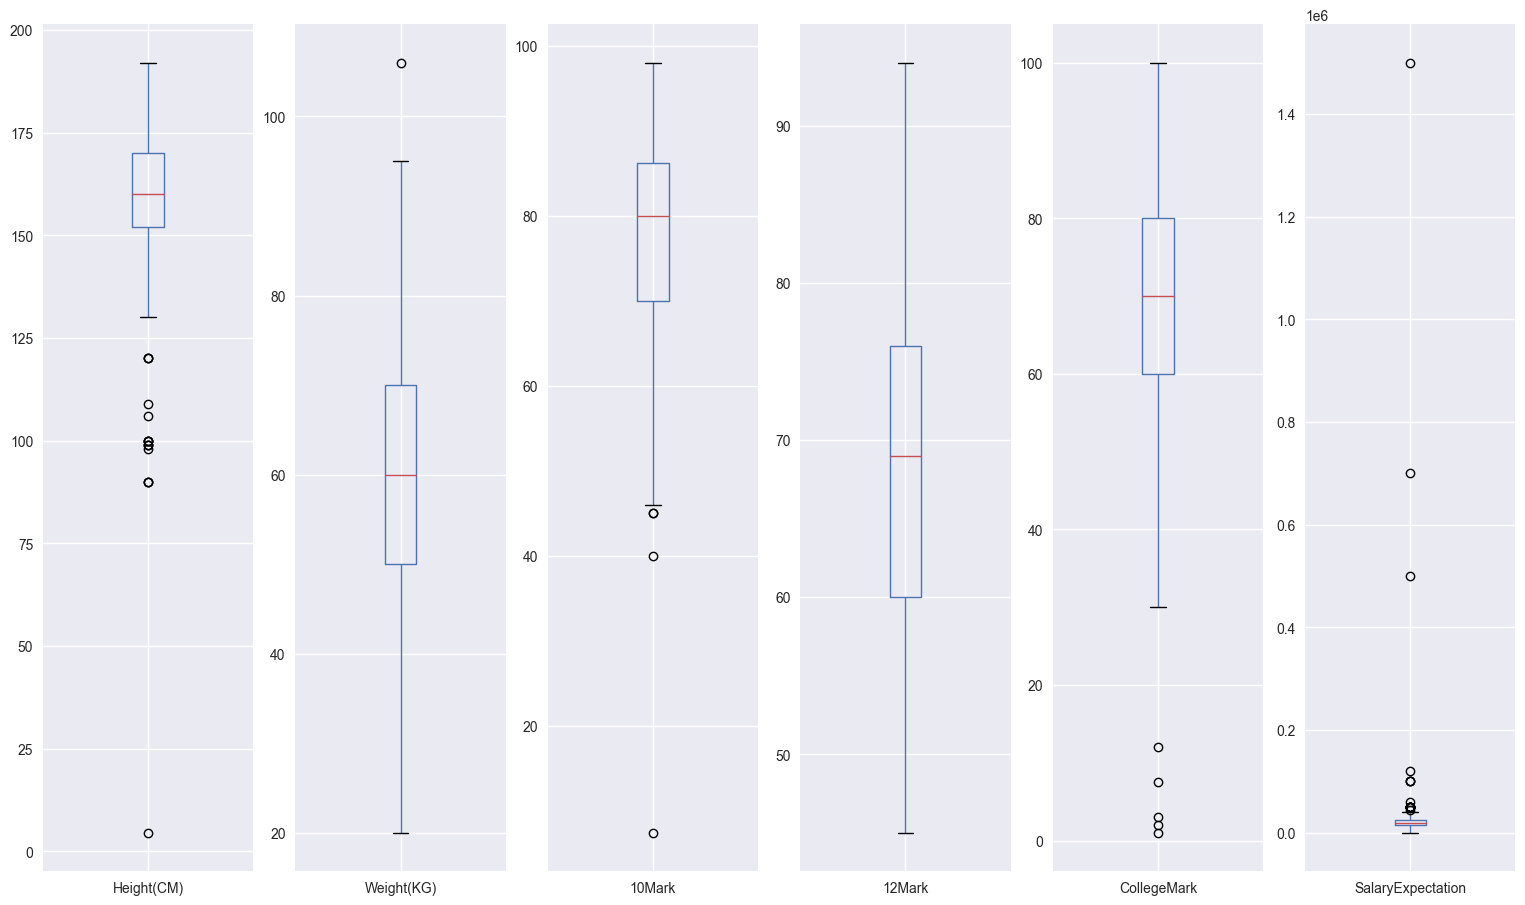

In [294]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')
fig, ax = plt.subplots(1, 6, figsize=(19, 11))

for i in range(6):
    X[[X.columns[i]]].boxplot(ax=ax[i])
    
# Да, как мы видим, в первом и последних двух столбцах есть выбросы
    

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

<AxesSubplot:>

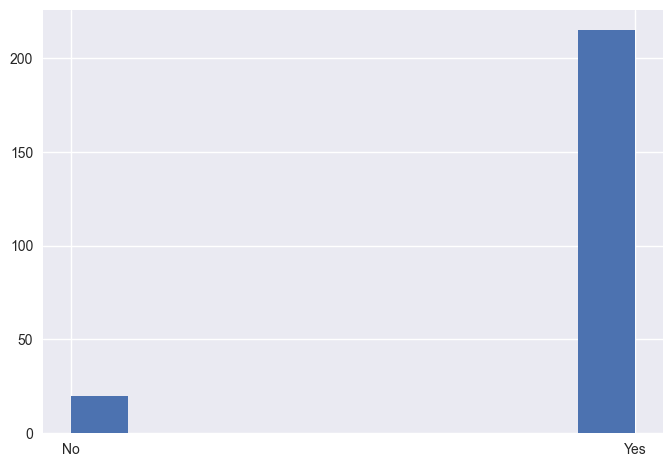

In [295]:
df['LikeDegree'].hist() # Есть дисбаланс классов, нельзя использовать accuracy, можно precision, recall и F-measure

**Задание 8.**  Переведите целевую переменную к численному формату.

In [296]:
df['LikeDegree'] = df['LikeDegree'].apply(lambda x: 1 if x == 'Yes' else 0)

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [297]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y = df['LikeDegree']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [298]:
# Наивная модель: все довольны учебой
nai_y = np.ones(80)


**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [299]:
from sklearn.neighbors import KNeighborsClassifier
for n in (3, 5, 7):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    p_pred_knn = knn.predict_proba(X_test) 
    p_pred_knn = p_pred_knn[:, 1]

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [300]:
for k in (3, 5, 7):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    p_pred_knn = knn.predict_proba(X_test) 
    p_pred_knn = p_pred_knn[:, 1]
    print('k =', k)    
    print('Precision: ', precision_score(y_test, y_pred_knn))
    print('Recall: ', recall_score(y_test, y_pred_knn))
    print('F1: ', f1_score(y_test, y_pred_knn))
    print()

k = 3
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764

k = 5
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764

k = 7
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764



**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [301]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

In [302]:
for k in (3, 5, 7):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    p_pred_knn = knn.predict_proba(X_test) 
    p_pred_knn = p_pred_knn[:, 1]
    print('k =', k)    
    print('Precision: ', precision_score(y_test, y_pred_knn))
    print('Recall: ', recall_score(y_test, y_pred_knn))
    print('F1: ', f1_score(y_test, y_pred_knn))
    print()
    
# Результаты не изменились 

k = 3
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764

k = 5
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764

k = 7
Precision:  0.9154929577464789
Recall:  1.0
F1:  0.9558823529411764



**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [311]:
new_df2 = df[['Height(CM)', 'Weight(KG)',	'10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'LikeDegree']]

In [312]:
for col_name in new_df2.columns[:5]:
    column = new_df2[col_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    new_df2 = new_df2[(new_df2[col_name] > q1 - 1.5*iqr) & (new_df2[col_name] < q3 + 1.5*iqr)]

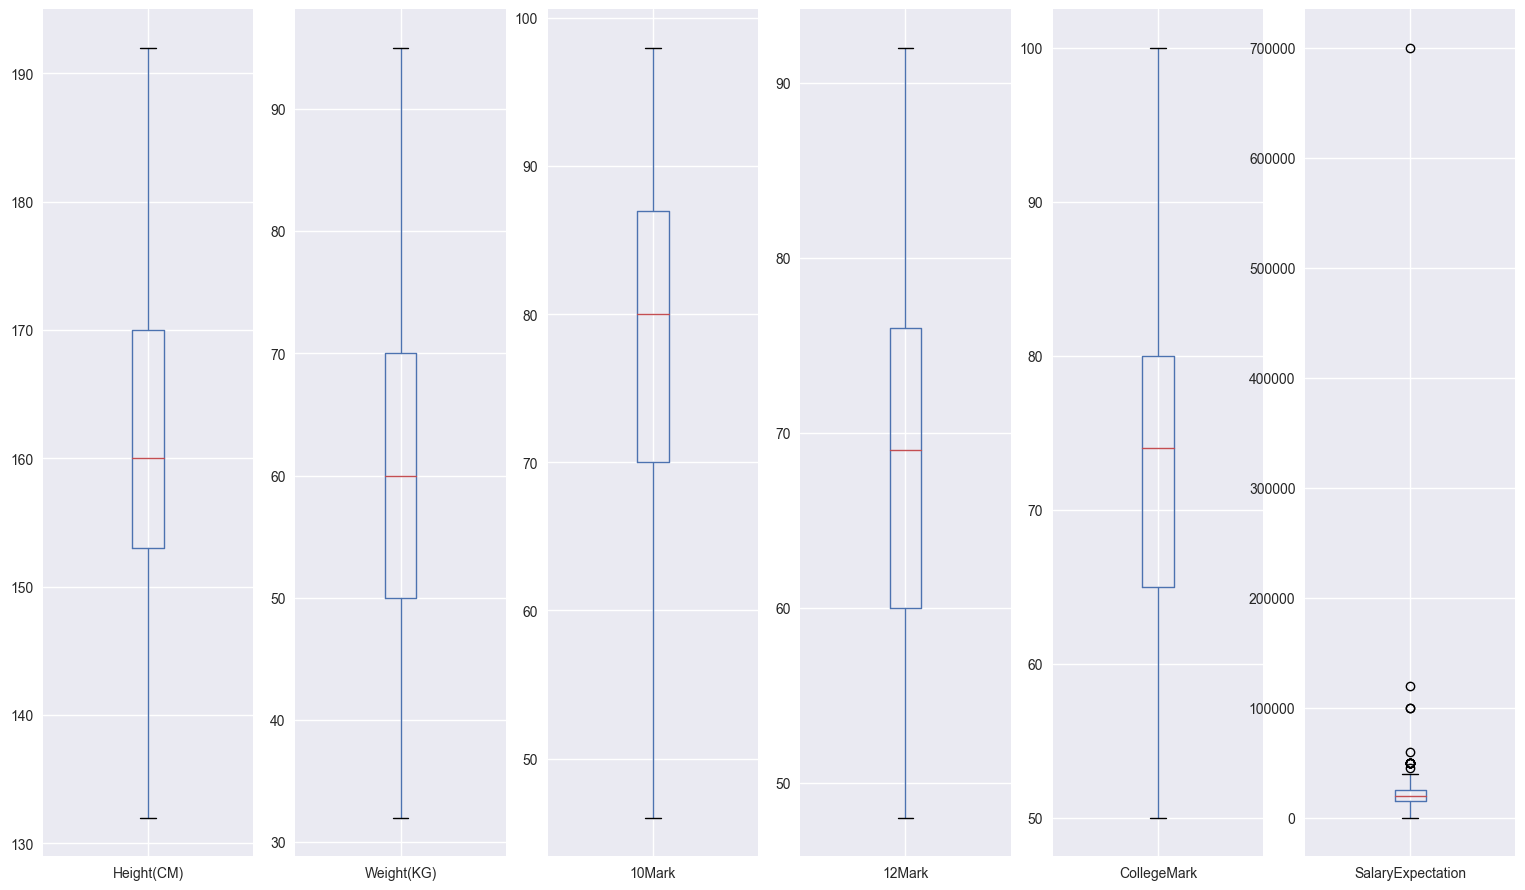

In [314]:
fig, ax = plt.subplots(1, 6, figsize=(19, 11))

for i in range(6):
    new_df2[[new_df2.columns[i]]].boxplot(ax=ax[i])
    

In [317]:
X_train, X_test, y_train, y_test = train_test_split(new_df2[['Height(CM)', 'Weight(KG)',	'10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation']],
                                                    new_df2['LikeDegree'], test_size=0.3, random_state=1)

for k in (3, 5, 7):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    y_pred_knn = knn.predict(X_test)
    p_pred_knn = knn.predict_proba(X_test) 
    p_pred_knn = p_pred_knn[:, 1]
    print('k =', k)    
    print('Precision: ', precision_score(y_test, y_pred_knn))
    print('Recall: ', recall_score(y_test, y_pred_knn))
    print('F1: ', f1_score(y_test, y_pred_knn))
    print()
    
    # после удаления выбросов качество модели повысилось

k = 3
Precision:  0.9516129032258065
Recall:  1.0
F1:  0.9752066115702479

k = 5
Precision:  0.9516129032258065
Recall:  1.0
F1:  0.9752066115702479

k = 7
Precision:  0.9516129032258065
Recall:  1.0
F1:  0.9752066115702479



**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

In [ ]:
# Модель после удаления выбросов оказалась наиболее качественной, так как разброс значений переменных становится ниже,
# что облегчает задачу определения класса
# Получилось, что число соседей не влияет на качество модели, поэтому логично выбрать минимальное их количество, то есть 3